In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested, daily_vaccinations, population_vaccinated
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
38,074 cases (7 day average) as of Thu 15 Jul, +3,813.6 since Wed 14 Jul
634 hospitalised (7 day average) as of Sun 18 Jul, +28.0 since Sat 17 Jul
31 died (7 day average) as of Thu 15 Jul, +1.4 since Wed 14 Jul


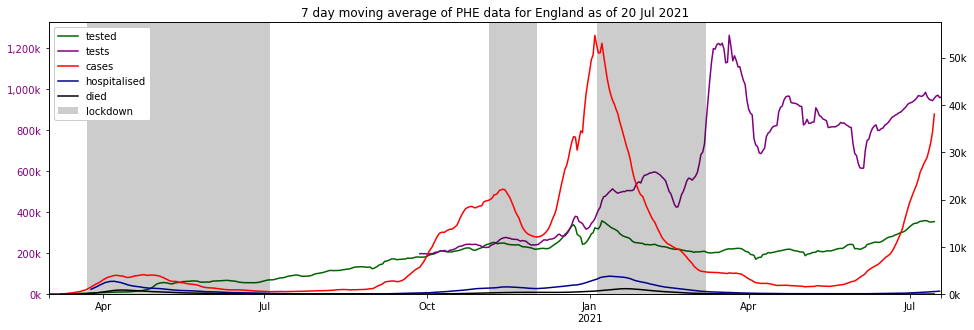

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

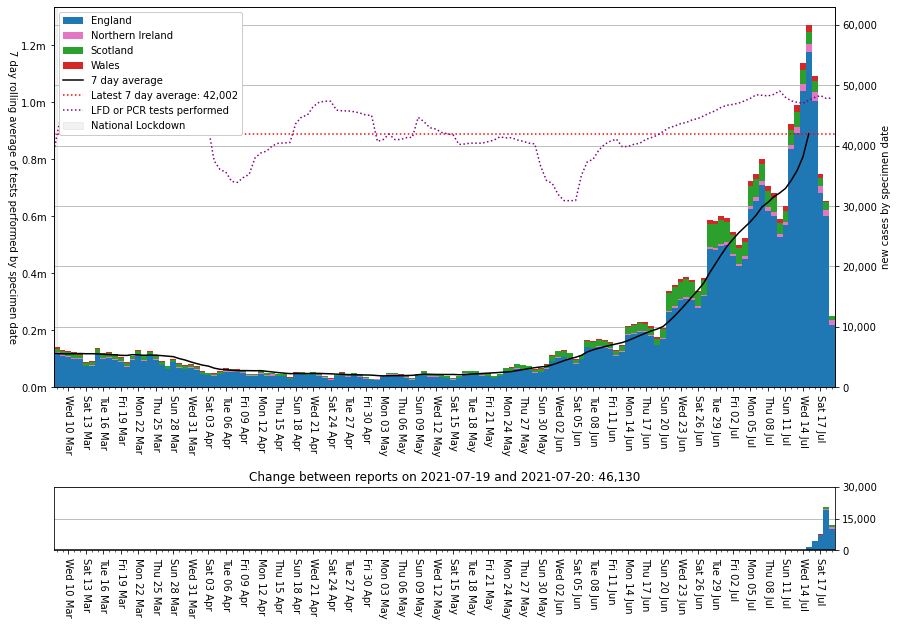

In [4]:
plot_areas(for_date, 'cases_nations', earliest=lockdown3[1], date_format='%a %d %b')

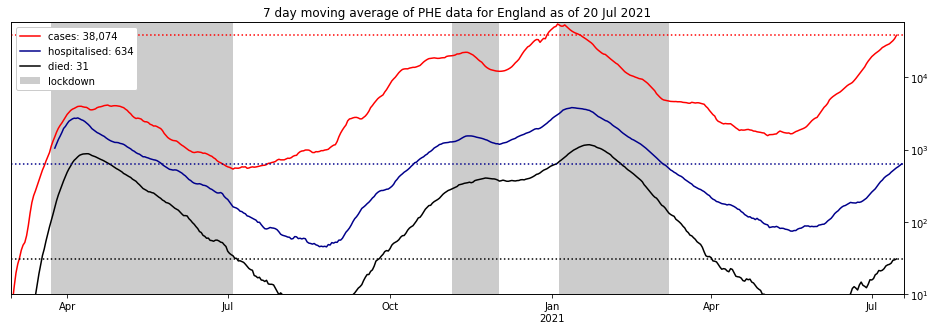

In [23]:
plot_summary(earliest_date='2020-02-29', show_latest='lines', log=True,
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

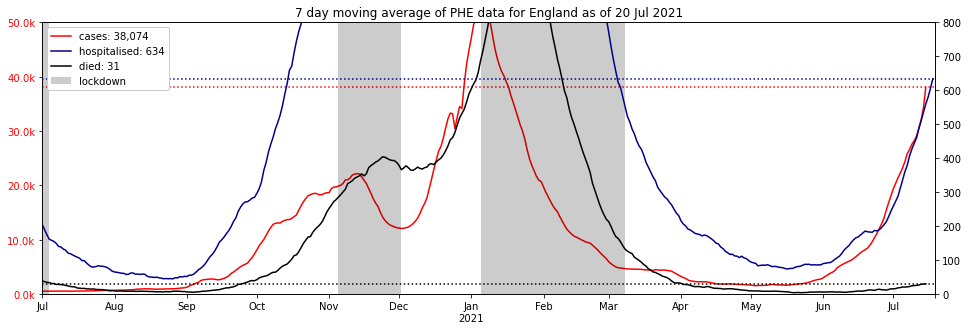

In [6]:
plot_summary(earliest_date='2020-07-01', show_latest='lines',
             left_series=(s.new_cases_sum,), left_formatter=per0k_formatter, left_ymax=50_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=800)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,19 Jul 21,"+30,325,879","+38,895,279","+30,325,879","+112,544","+31,469","+112,544"
Northern Ireland,19 Jul 21,"+988,658","+1,187,005","+988,658","+6,096","+1,136","+6,096"
Scotland,19 Jul 21,"+2,995,086","+3,984,433","+2,995,086","+16,340","+2,483","+16,340"
Wales,19 Jul 21,"+1,933,664","+2,282,992","+1,933,664","+8,580",+582,"+8,580"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,30325879.0,38895279.0,8569400.0,56286961,53.877272,15.224485,30.898243
1,Northern Ireland,N92000002,988658.0,1187005.0,198347.0,1893667,52.208651,10.474228,37.317121
2,Scotland,S92000003,2995086.0,3984433.0,989347.0,5463300,54.821921,18.108963,27.069116
3,Wales,W92000004,1933664.0,2282992.0,349328.0,3152879,61.330105,11.079651,27.590244


'partial: 46,349,709 (69.4%), full: 36,243,287'

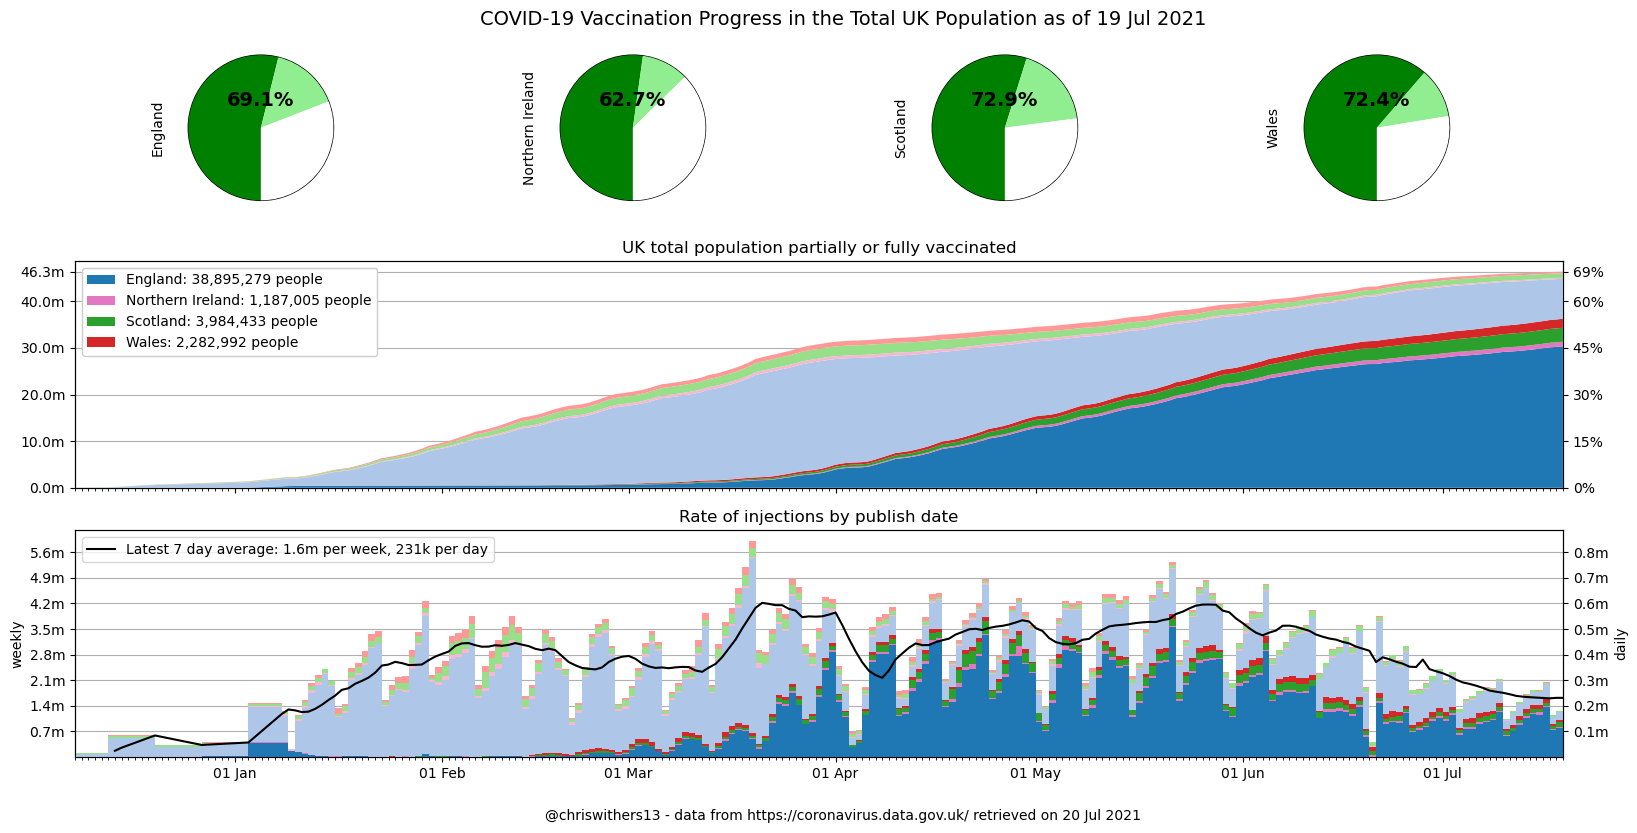

In [8]:
results = vaccination_dashboard()
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

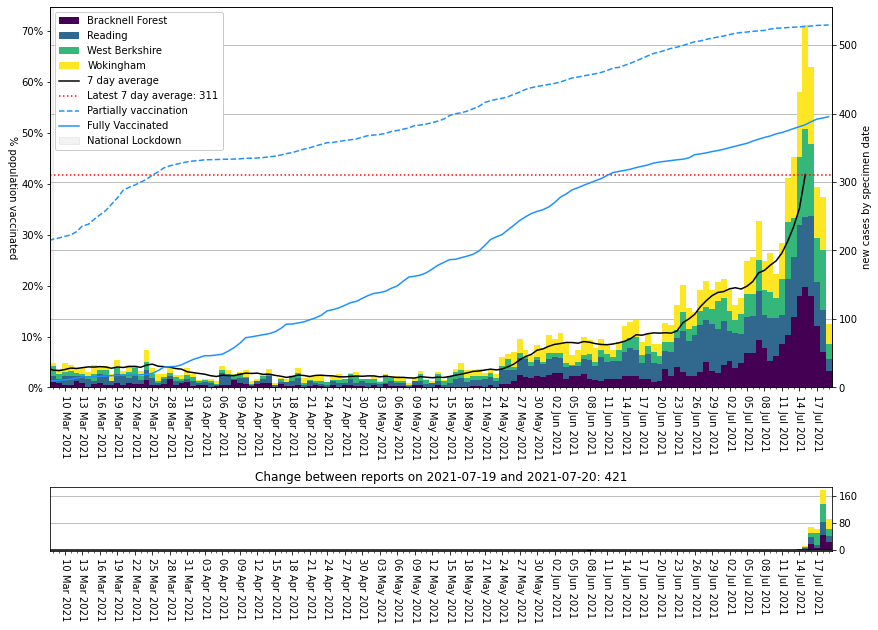

In [9]:
plot_areas(for_date, areas=my_areas, earliest=lockdown3[1], lines=population_vaccinated)

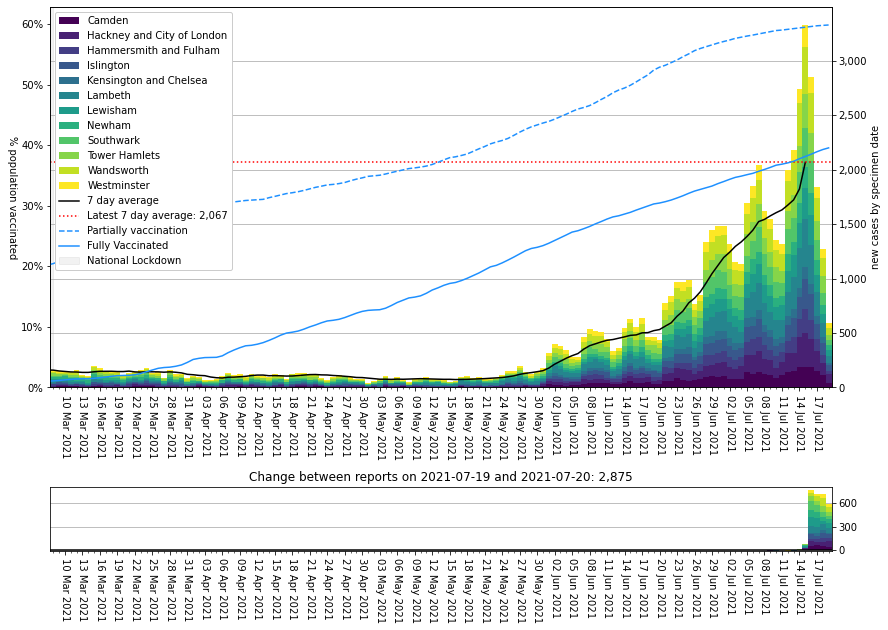

In [10]:
plot_areas(for_date, areas=london_areas, earliest=lockdown3[1], lines=population_vaccinated)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E06000003,Redcar and Cleveland,1368.574553,1877.0,2021-07-19
E06000002,Middlesbrough,1280.323450,1805.0,2021-07-19
E06000004,Stockton-on-Tees,1073.231044,2118.0,2021-07-19
E07000029,Copeland,1053.048414,718.0,2021-07-19
E06000001,Hartlepool,992.921431,930.0,2021-07-19
E08000023,South Tyneside,992.210682,1498.0,2021-07-19
E08000024,Sunderland,972.974919,2702.0,2021-07-19
E06000012,North East Lincolnshire,854.208056,1363.0,2021-07-19
E06000025,South Gloucestershire,824.993949,2352.0,2021-07-19


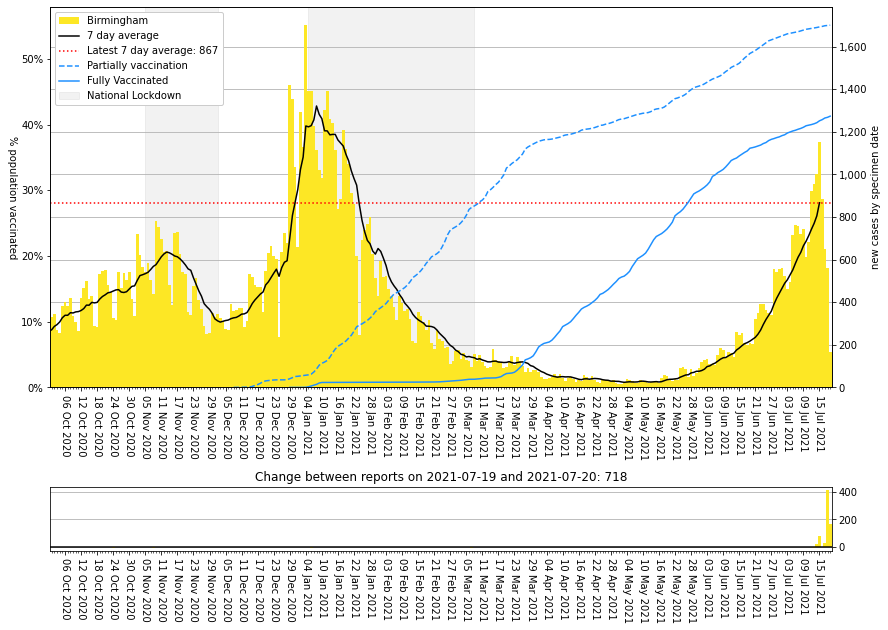

In [20]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=population_vaccinated)

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000025,Birmingham,470.215867,5369.0,2021-07-19
E08000035,Leeds,555.262066,4404.0,2021-07-19
E06000047,County Durham,716.665346,3799.0,2021-07-19
E06000023,"Bristol, City of",792.443302,3672.0,2021-07-19
E08000032,Bradford,571.903901,3087.0,2021-07-19
E08000019,Sheffield,507.477947,2968.0,2021-07-19
E08000003,Manchester,510.619363,2823.0,2021-07-19
E08000024,Sunderland,972.974919,2702.0,2021-07-19
E08000017,Doncaster,777.517715,2425.0,2021-07-19


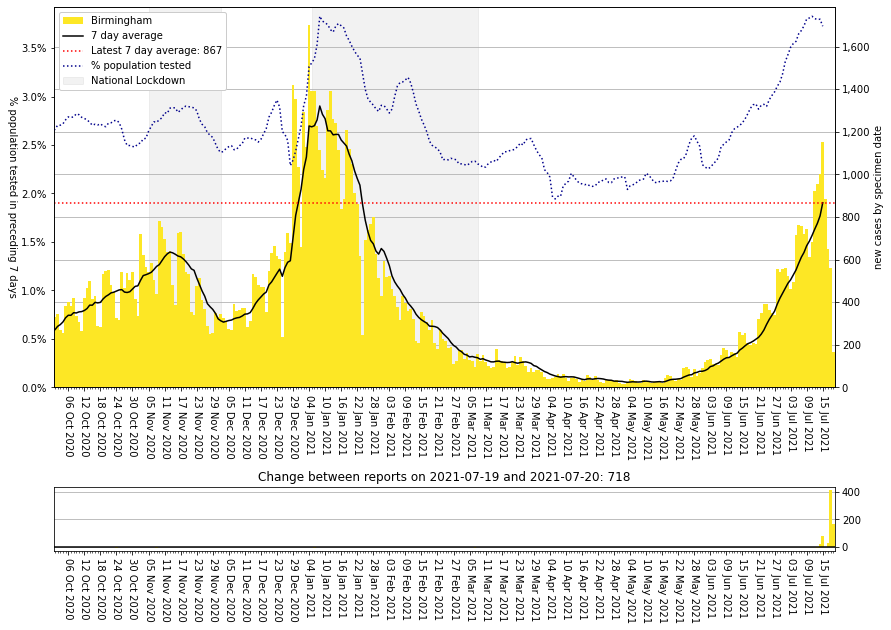

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name], colormap='viridis_r', lines=unique_people_tested)

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 3.0
phe_max = 1.3

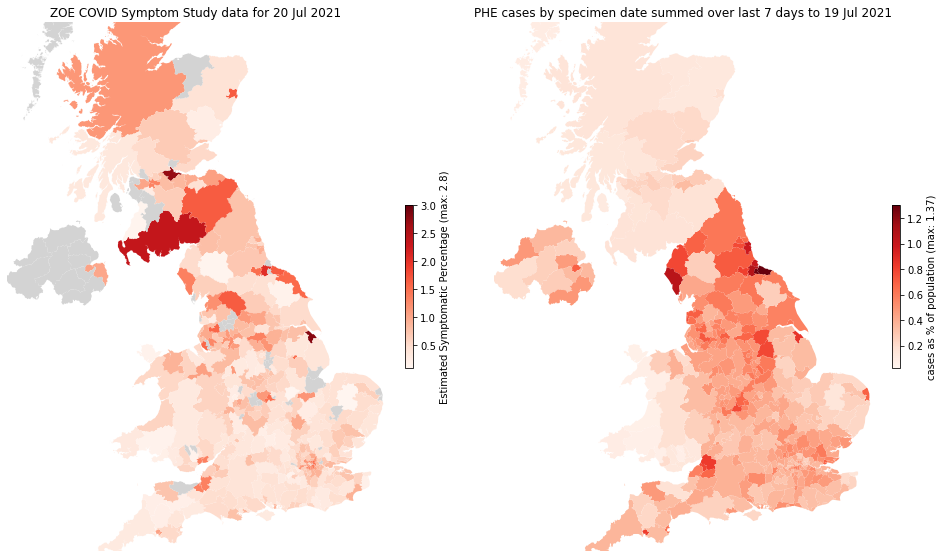

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...